<a href="https://colab.research.google.com/github/jahidhasan299/jahidhasan299-Deep-Learning-With-7-Real-Projects/blob/main/Basic_classification_Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction
The clothing Fashion_MNIST is a dataset of images from Zalando(Europe's biggest online fashion retailer)
It's consists of 60000 training samples and 10000 testing samples
Each sample is a 28*28 grayscale image assciated with a label from 10 classes

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

# Importing the neccessary library and data

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_labels)

[9 0 0 ... 3 0 5]


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [8]:
train_images.shape

(60000, 28, 28)

In [12]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:
test_images.shape

(10000, 28, 28)

In [10]:
# Likewise, there are 60,000 labels in the training set:
len(train_labels)

60000

In [11]:
# Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Preprocess the data
The data must be preprocessed before training the network. If inspect the first image in the training set, we will see that the pixel values fall in the range of 0 to 255:

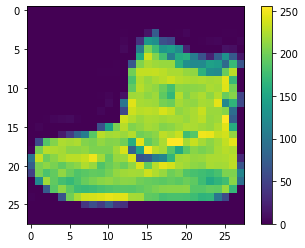

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

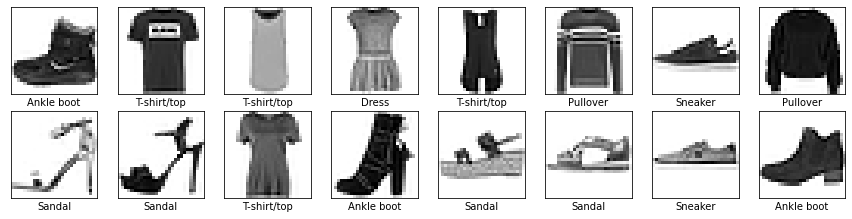

In [18]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Architecting CNN Model
The CNN has two main components: The features extractor of a set of convolutional and pooling layers and the classifier backend similar to a regular neural network

In [20]:
# Reshape the data into 4-dimentions
x_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
x_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


The first dimension is the number of samples

---

The fourth dimension is the appended one representing the grayscale images
# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

Set up the layers

In [21]:
# Random seed in tensorflow for reproducility
tf.random.set_seed(42)
from tensorflow.keras import datasets, layers, models, losses 
model = models.Sequential()
# add the first convolutional layers with 32 small-sized 3*3 filters
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)))
# convolutional layers is followed by a max-pooling layer with a  2*2 filter
model.add(layers.MaxPool2D(2,2))

# Second convolutional layers with 64 size 3*3 filters
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))

# Third convolutional layers with 128 size 3*3 filters
model.add(layers.Conv2D(128,(3,3), activation='relu'))
# The resulting filter maps are flatten to provide features to the downstream classifier backend
model.add(layers.Flatten())

# Classifier backed
model.add(layers.Dense(64, activation='relu'))

# Output with 10 nodes demonstrating 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Summarices the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

**The benefits of applying pooling are:**
1.   Avoiding overfitting
2.   Reducing training cost



# Train the model
**Training the neural network model requires the following steps:**

Feed the training data to the model. The training data is in the train_images and train_labels arrays.

The model learns to associate images and labels. To make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array. 

# Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [22]:
 # Batch size is 32 by default
 model.fit(x_train, train_labels, validation_data=(x_test, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.4732 - accuracy: 0.8262 - val_loss: 0.3361 - val_accuracy: 0.8804
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3041 - accuracy: 0.8891 - val_loss: 0.3639 - val_accuracy: 0.8685
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2598 - accuracy: 0.9040 - val_loss: 0.2805 - val_accuracy: 0.8960
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2278 - accuracy: 0.9155 - val_loss: 0.2636 - val_accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2053 - accuracy: 0.9244 - val_loss: 0.2656 - val_accuracy: 0.9049
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1821 - accuracy: 0.9317 - val_loss: 0.2552 - val_accuracy: 0.9075
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1636 - accuracy: 0.9381 - val_loss: 0.2580 - val_ac

# Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [26]:
# 96% on training set and 91% on testing set
# Double check the performence
test_loss , test_acc = model.evaluate(x_test, test_labels, verbose=2)
print("Accuracy on the test set: ", test_acc)

313/313 - 1s - loss: 0.3049 - accuracy: 0.9095 - 638ms/epoch - 2ms/step
Accuracy on the test set:  0.909500002861023


# Make predictions
With the model trained, to make predictions about some images. The model's linear outputs.

In [29]:
predictions = model.predict(x_test)
print(predictions[0])

[2.6538676e-12 5.1054824e-12 3.1595245e-13 7.5452260e-16 6.1111787e-14
 1.0551089e-07 1.4841165e-17 3.2814410e-07 2.0824588e-10 9.9999952e-01]


A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [30]:
print("Predicted label for the test label sample: ", np.argmax(predictions[0]))

Predicted label for the test label sample:  9


In [31]:
print("True label for the test sample: ", test_labels[0])

True label for the test sample:  9


**Graph this to look at the full set of 10 class predictions.**

# Verify predictions
With the model trained,  use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [41]:
def plot_image_prediction(i,images, predictions, labels, class_names):
  plt.subplot(1,2,1)
  plt.imshow(images[i], cmap=plt.cm.binary)
  prediction = np.argmax(predictions[i])
  color = 'blue' if prediction == labels[i] else 'red'
  plt.title(f"{class_names[labels[i]]}(predicted{class_names[prediction]})", color=color)
  plt.subplot(1,2,2)
  plt.grid(False)
  plt.xticks(range(10))
  plot = plt.bar(range(10), predictions[i], color='green')
  plt.ylim([0,1])
  plot[prediction].set_color('red')
  plot[prediction].set_color('blue')
  plt.show()

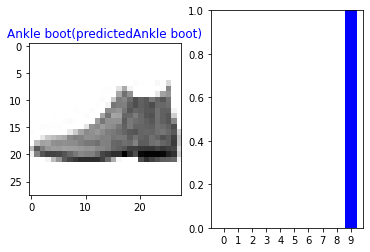

In [42]:
plot_image_prediction(0, test_images, predictions, test_labels, class_names)

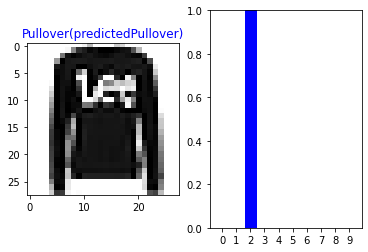

In [45]:
plot_image_prediction(1, test_images, predictions, test_labels, class_names)

In [46]:
filters, _ = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

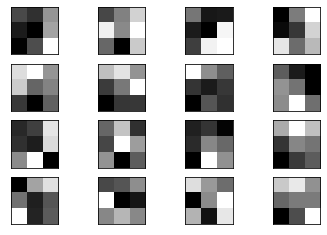

In [47]:
n_filters = 16
for i in range(n_filters):
  filter = filters[:, :, :, i]
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(filter[:,:,0], cmap='gray')
plt.show()

# Improving the classifier with data augmentation

In [63]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
n_small = 500
x_train = x_train[:n_small]
train_labels = train_labels[:n_small]
print(x_train.shape)

(500, 28, 28, 1)


In [64]:
model = models.Sequential()
# add the first convolutional layers with 32 small-sized 3*3 filters
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)))
# convolutional layers is followed by a max-pooling layer with a  2*2 filter
model.add(layers.MaxPool2D(2,2))

# Classifier backed
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [65]:
model.fit(x_train, train_labels, validation_data=(x_test, test_labels), epochs=20,batch_size=40)

Epoch 1/20
13/13 [==============================] - 2s 82ms/step - loss: 1.8449 - accuracy: 0.3540 - val_loss: 1.3516 - val_accuracy: 0.5749
Epoch 2/20
13/13 [==============================] - 1s 58ms/step - loss: 1.1091 - accuracy: 0.6540 - val_loss: 0.9309 - val_accuracy: 0.6803
Epoch 3/20
13/13 [==============================] - 1s 58ms/step - loss: 0.7440 - accuracy: 0.7480 - val_loss: 0.7988 - val_accuracy: 0.7133
Epoch 4/20
13/13 [==============================] - 1s 60ms/step - loss: 0.6219 - accuracy: 0.7920 - val_loss: 0.7435 - val_accuracy: 0.7324
Epoch 5/20
13/13 [==============================] - 1s 56ms/step - loss: 0.5315 - accuracy: 0.8260 - val_loss: 0.6996 - val_accuracy: 0.7518
Epoch 6/20
13/13 [==============================] - 1s 59ms/step - loss: 0.4581 - accuracy: 0.8520 - val_loss: 0.6861 - val_accuracy: 0.7570
Epoch 7/20
13/13 [==============================] - 1s 59ms/step - loss: 0.3857 - accuracy: 0.8920 - val_loss: 0.6147 - val_accuracy: 0.7832
Epoch 8/20
13

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Double check the performence
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=2)
print("Accuracy on the test set: ", test_acc)

313/313 - 2s - loss: 0.6824 - accuracy: 0.8036 - 2s/epoch - 5ms/step
Accuracy on the test set:  0.803600013256073


The model without augmentation has a classification accuracy of 80.36%

In [67]:
datagen = ImageDataGenerator(height_shift_range=3, horizontal_flip=True)
model_aug = tf.keras.models.clone_model(model)

In [ ]:
model_aug.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
train_generator = datagen.flow(x_train, train_labels, seed=2,batch_size=40)
model_aug.fit(train_generator, validation_data=(x_test, test_labels), epochs=50)
model_aug.summary()

In [70]:
# Double check the performence
test_loss, test_acc = model_aug.evaluate(x_test, test_labels, verbose=2)
print("Accuracy on the test set: ", test_acc)

313/313 - 1s - loss: 0.7799 - accuracy: 0.8136 - 1s/epoch - 4ms/step
Accuracy on the test set:  0.8136000037193298


Finally, use the trained model_aug to make a prediction 81.36 % which is little bit good than previous one(80.14%)